<h1 align='center'> 파이썬과학프로그래밍기초 실습 10</h1>

<p style="text-align: right"> 2023.11.23.</p>

### <div class="alert alert-block alert-info">
    
- 파일 이름에서 00000000을 자신의 학번으로, name을 자신의 이름으로 수정하세요.

- 다음 줄에 자신의 이름, 학번, 학과(전공)을 적으세요.

* 이름:김민준   &nbsp;&nbsp;          학번:20235128    &nbsp;&nbsp;         학과(전공):소프트웨어융합
    
</div>

- Jupyter notebook에 대한 설명은 [The Jupyter Notebook](https://jupyter-notebook.readthedocs.io/en/stable/)을  참고하라

- Markdown은 [Markdown Guide](https://www.markdownguide.org/)를 참고하라.
- [Markdown Cheat Sheet](https://www.markdownguide.org/cheat-sheet/)

* 과제 제출: 11월 22일 (수) 오후 10:00까지 최종본 제출. 


#### 문제 0: 아래 셀에 다음 명령을 실행하라.

```
import numpy as np
import matplotlib.pyplot as plt
import scipy.datasets as ds
```


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.datasets as ds

### 예제 1.
다음 셀은 중심이 (200,200)이고 반지름이 150인 원주 위에 5 개의 꼭지점이 존재하는 별 그림을 그리는 프로그램이다.

이 프로그램을 이해하고 실행하라.

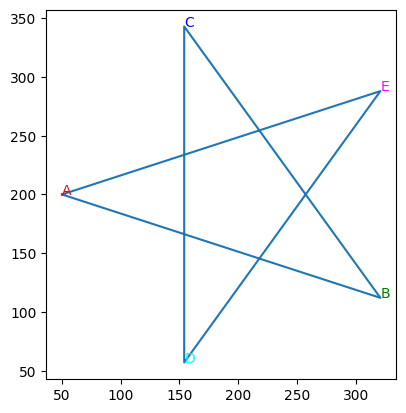

In [2]:
radius = 150
center = (200,200)
theta = np.linspace(0, np.pi*4, 6) + np.pi
x = radius*np.cos(theta) + center[0]
y = radius*np.sin(theta) + center[1]
x = np.round(x, 0).astype(np.int32)
y = np.round(y, 0).astype(np.int32)

A, B, C, D, E = ( np.array([x[n], y[n]]) for n in range(5) )
vertex_color_names = ('red', 'green', 'blue', 'cyan', 'magenta')
vertex_names = list('ABCDE')
plt.gca().set_aspect(1)
for n, c in enumerate(vertex_names):
    plt.text(x[n], y[n], c, color=vertex_color_names[n])
plt.plot(x, y)
plt.show()

#### 1.1

5 개의 꼭지점의 좌표를 조사해 보면 다음과 같다.

In [3]:
A, B, C, D, E

(array([ 50, 200]),
 array([321, 112]),
 array([154, 343]),
 array([154,  57]),
 array([321, 288]))

### 예제 2.
예제 1의 그림의 내부에 색을 칠한 영사을 ndarray를 이용해서 다음과 같이 표현할 수 있다.

단, row 방향의 index를 그림의 $x$ 축에, column 방향의 index를 그림의 $y$ 축에 대응하여 생각하려면, 예제 1의 그림을 $-\pi/2$ 만큼 회전시켜야 한다. 즉, 시계 방향으로 90도 회전시켜야 한다.

#### 2.1

화소 수가 $401 \times 401$ 검은색 정사각형 영상을 표현하는 ndarray img를 만들고 화면에 표시하라.

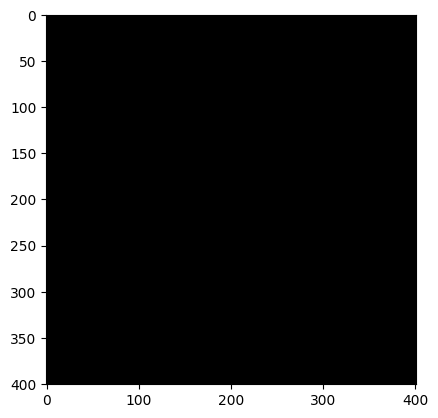

In [4]:
cols = rows = 401
img = np.full((rows, cols, 3), 0, np.uint8)
plt.imshow(img)
plt.show()

#### 2.2

그림 1에서 정한 꼭지점 5개의 위치에 반지름이 20인 원을 영상에 표시하라. 단, 그림 1이 시계 방향으로 90도 회전되어야 하고, 원의 색은 그림 1의 A, B, C, D, E의 색과 같아야 한다.

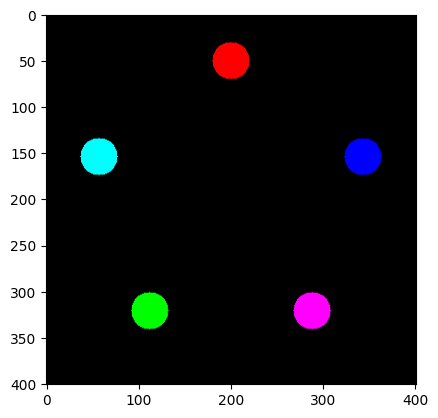

In [5]:
v_rad = 20
V = (A, B, C, D, E)
vertex_colors = np.array([[255,0,0],
                          [0,255,0],
                          [0,0,255],
                          [0,255,255],
                          [255,0,255]])

r_idx = np.arange(rows).reshape(-1,1)
c_idx = np.arange(cols).reshape(1,-1)
for n, v in enumerate(V):
    idx = (r_idx - v[0])**2 + (c_idx-v[1])**2 <= v_rad**2
    img[idx] = vertex_colors[n]
plt.imshow(img)
plt.show()

#### 2.3
다시 401 x 401 검은색 영상 img1을 만들고
직선 AB 윗 부분을 빨간색으로 채운 영상을 화면에 표시하라. (직선 위, 아래는 영상에서는 가로 방향을 기준으로 생각해야 한다.)

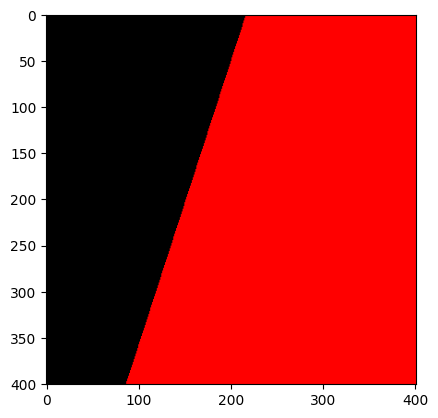

In [6]:
img1 = np.full((rows, cols, 3), 0, np.uint8)

# Upper part of line AB 
slopeAB = (A-B)[1] / (A-B)[0]
idxUpperAB = (c_idx > (slopeAB * (r_idx - A[0]) + A[1]))
img1[idxUpperAB] = vertex_colors[0]
plt.imshow(img1)
plt.show()

#### 2.4
다시 401 x 401 검은색 영상 img1을 만들고
직선 AB 윗 부분이면서 직선 BC의 아랫 부분이 되는 영역을 빨간색으로 채운 영상을 화면에 표시하라.

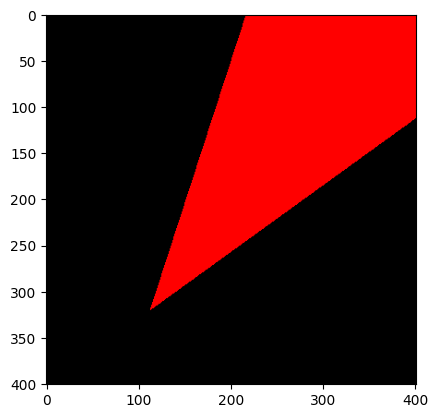

In [7]:
img1 = np.full((rows, cols, 3), 0, np.uint8)

# Lower part of line BC
slopeBC = (C-B)[1] / (C-B)[0]
idxLowerBC = c_idx < (slopeBC * (r_idx - B[0]) + B[1])
idx = idxUpperAB & idxLowerBC
img1[idx] = vertex_colors[0]

plt.imshow(img1)
plt.show()

#### 2.5
다시 401 x 401 검은색 영상 img1을 만들고
직선 AB 윗 부분이면서 직선 BC의 아랫 부분이면서 직선 CD의 오른쪽(그림에서 수평선의 아래) 영역을 빨간색으로 채운 영상을 화면에 표시하라.

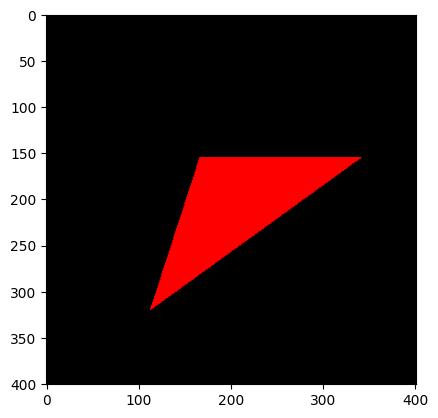

In [8]:
img1 = np.full((rows, cols, 3), 0, np.uint8)
# Right part of line CD
idxRightCD = r_idx > C[0]
idxABCD = idxUpperAB & idxLowerBC & idxRightCD
img1[idxABCD] = vertex_colors[0]

plt.imshow(img1)
plt.show()

### 문제 1.
예제 2는 세 직선 AB, BC, CD를 이용해서 삼각형을 그린 것이다.

다시 401 x 401 검은색 영상 img2 내부에 예제 2와 같은 방법으로 세 직선 BC, CD, DE로 만들어지는 삼각형을 초록색으로 채운 영상 img2를 만들고 화면에 표시하라.

결과는 다음과 같아야 한다.

<img src='triangle_BCDE.png'  width='50%'/>


### 문제 2.

예제 2에서 구한 img1과 문제 1에서 구한 img2를 더한 영상을 화면에 표시하라.

결과는 다음과 같아야 한다.

<img src='polygon_ABCDE.png'  width='50%'/>


### 문제 3.

다시 401 x 401 검은색 영상 img3 내부에 예제 2와 같은 방법으로 세 직선 CD, DE, EA로 만들어지는 삼각형을 파란색으로 채운 영상 img3를 만들고 화면에 표시하라.

결과는 다음과 같아야 한다.

<img src='triangle_CDEA.png'  width='50%'/>


### 문제 4.

예제 2에서 구한 img1과 문제 1에서 구한 img2와 문제 3에서 구한 img3를 더한 영상을 화면에 표시하라.

결과는 다음과 같아야 한다.

<img src='polygon_ABCDEA.png'  width='50%'/>


### 문제 5.

다시 401 x 401 검은색 영상 img4 내부에 세 직선 AB, CD, EA로 만들어지는 삼각형을 초록색으로 채운 영상을 만들고 화면에 표시하라.

결과는 다음과 같아야 한다.

<img src='triangle_ABCDEA.png'  width='50%'/>


### 문제 6.

예제 2에서 구한 img와 문제 1에서 구한 img2와 문제 3에서 구한 img3와 문제 5에서 구한 img4를 더한 영상을 화면에 표시하라.

결과는 다음과 같아야 한다.

<img src='polygon_star.png'  width='50%'/>


### 예제 3.

다음 셀은 $\sin(2\pi t)$의 그래프를 그리는 Python 프로그램이다. 이 프로그램을 이해하라.

그림의 크기는 가로 8 인치, 세로 3인치이고, 선과 마커의 색은 r=0, g=0.3, b=0.6이다.

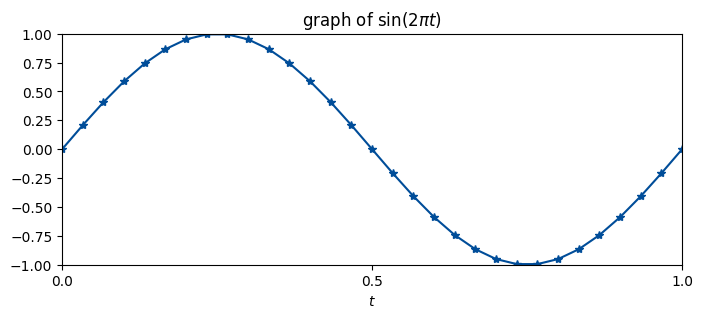

In [9]:
t = np.linspace(0, 1, 31)
x = np.sin(2*np.pi*t)
plt.figure(figsize=(8,3))
plt.plot(t, x, '*-', color=(0, 0.3, 0.6))
plt.xticks([0, 0.5, 1])
plt.title("graph of $\sin(2\pi t)$")
plt.xlim(0, 1)
plt.ylim(-1, 1)
plt.xlabel('$t$')
plt.show()

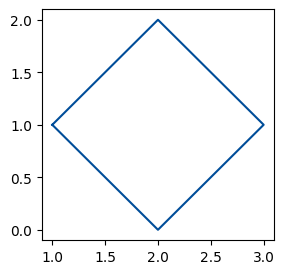

In [10]:
t = [1, 2, 3, 2, 1]
x = [1,2,1,0,1]
plt.figure(figsize=(3,3))
plt.plot(t, x, '-', color=(0, 0.3, 0.6))
plt.show()

### 예제 4.

다음 셀은 $\cos(t)$의 그래프를 그리는 Python 프로그램이다. 이 프로그램을 이해하라.

그림의 크기는 가로 8 인치, 세로 3인치이고, 선과 마커의 색은 'cyan'이다.


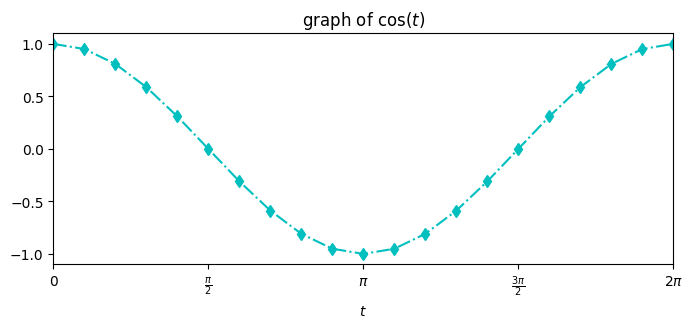

In [11]:
t = np.linspace(0, 2*np.pi, 21)
x = np.cos(t)
plt.figure(figsize=(8,3))
plt.plot(t, x, 'cd-.')
xlabels = [0, r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$", r"$2\pi$"]
plt.xticks([0, np.pi/2, np.pi, np.pi*3/2, 2*np.pi], labels=xlabels)
plt.title("graph of $\cos(t)$")
plt.xlim(0, 2*np.pi)
plt.xlabel('$t$')
plt.savefig('fig-cos(t).png')
plt.show()

### 예제 5.
"company-sales.csv" 파일을 읽고 아래 문제들을 풀어라.

numpy.genfromtxt 함수를 이용하여 csv 파일을 읽을 때, 다음 명령을 사용하면 된다.
```
data = np.genfromtxt("company-sales.csv", dtype=int, delimiter=',', names=True)
```

In [12]:
data = np.genfromtxt("company-sales-sample.csv", dtype=int, delimiter=',', names=True, encoding='utf-8')
data

array([( 1, 208, 154, 435,  815, 210, 1822, 14852000),
       ( 2, 180, 156, 510,  620, 208, 1674, 14212000),
       ( 3, 235, 135, 476,  950, 350, 2146, 17460000),
       ( 4, 321, 276, 587,  870, 218, 2272, 19150000),
       ( 5, 295, 208, 487,  760, 178, 1928, 16066000),
       ( 6, 260, 210, 510,  790, 208, 1978, 16520000),
       ( 7, 275, 147, 470,  880, 212, 1984, 16064000),
       ( 8, 298, 125, 532,  960, 258, 2173, 17544000),
       ( 9, 327, 189, 590,  810, 198, 2114, 17624000),
       (10, 198, 178, 789,  987, 213, 2365, 19662000),
       (11, 243, 235, 695, 1201, 256, 2630, 21480000),
       (12, 180, 180, 698, 1323, 198, 2579, 20498000)],
      dtype=[('월', '<i4'), ('상품1', '<i4'), ('상품2', '<i4'), ('상품3', '<i4'), ('상품4', '<i4'), ('상품5', '<i4'), ('합계', '<i4'), ('수익', '<i4')])

plt.rcParams['font.family'] = 'NanumGothic'
- 위 문장을 실행했을 때, '-' 부호가 나타나지 않는 경우가 있다. 이럴 때 아래 문장을 추가하면 된다.

plt.rcParams['axes.unicode_minus'] = False